# Модель предпочтительного присоединения

__Авторы задач: Макрушин С.В (SVMakrushin@fa.ru), Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 2: Модели"
* Документация:
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.extended_barabasi_albert_graph.html
* Дополнительные источники:
    * https://barabasi.com/f/623.pdf

## Вопросы для совместного обсуждения

1\. Обсудите модель предпочтительного присоединения

In [ ]:
import numpy as np

In [ ]:
a = np.random.normal(0, 1, size=50)
a[:5] = 0
l = np.cumsum(np.abs(a))
l

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.09590618,  2.50996403,  2.97861289,  4.4858809 ,  5.52020318,
        6.45064142,  7.18446985,  7.71093348,  8.13167392,  8.45748664,
       10.06603658, 10.46021462, 10.68844316, 10.91355131, 11.38762198,
       12.83417516, 12.9122536 , 13.33692574, 14.7138188 , 14.81271419,
       16.39671549, 16.49914339, 17.06407466, 17.16217917, 18.60445571,
       20.37853514, 20.77099752, 21.3216818 , 21.84326512, 23.11993571,
       24.33784437, 24.66803088, 24.93680566, 26.40279224, 26.60719141,
       27.4809066 , 27.50503959, 29.02215127, 29.46822486, 29.68065501,
       32.20834394, 33.40446696, 33.42948782, 34.70469364, 34.8307509 ])

In [ ]:
l[13+5]

10.91355130937328

In [ ]:
l[20]

12.834175164270762

2\. Обсудите процедуру log-binning

In [ ]:
np.geomspace(1, 1000, 3)

array([   1.       ,   31.6227766, 1000.       ])

In [ ]:
np.logspace(0, 3, 3)

array([   1.       ,   31.6227766, 1000.       ])

In [ ]:
np.linspace(1, 1000, 3) # не подойдет

array([   1. ,  500.5, 1000. ])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Используя реализацию модели предпочтительного присоединения Барабаши-Альберта из `networkx`, постройте сеть с кол-вом узлов `n` > 50. Визуализируйте полученный граф, сделайте размер и цвет узлов пропорциональными их степени. Постройте график выборочной функции распределения степеней узлов для сети.

- [ ] Проверено на семинаре

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [11]:
G = nx.barabasi_albert_graph(60, 3)

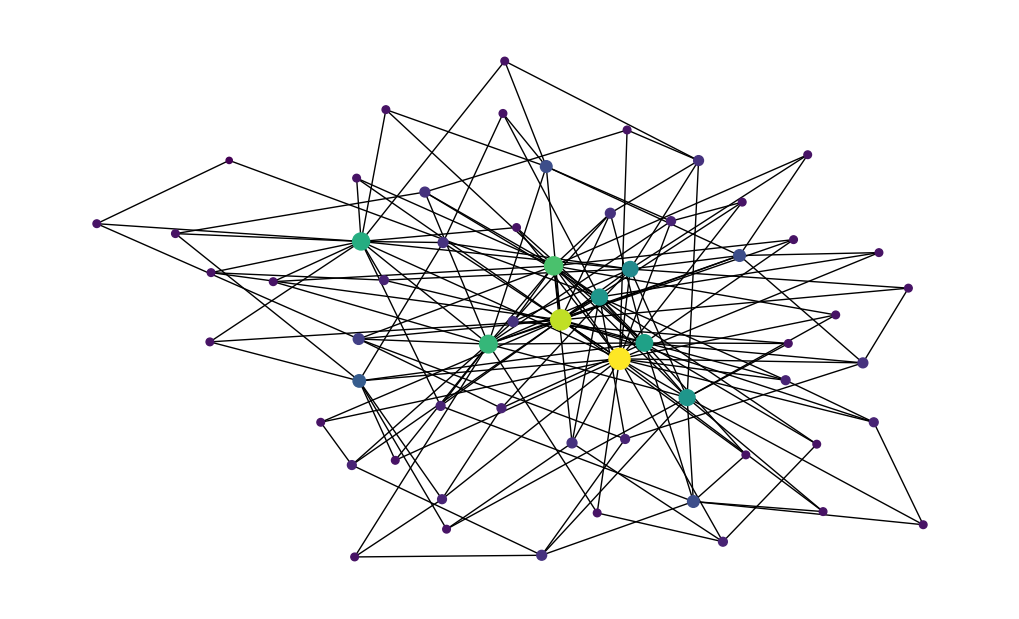

In [12]:
plt.figure(figsize=(10, 6))
node_sizes = [10 * d for d in dict(G.degree).values()]
node_colors = [d for d in dict(G.degree).values()]
nx.draw(G, node_size=node_sizes, node_color=node_colors)
plt.show()

In [13]:
degrees = dict(G.degree()).values()

In [14]:
d_unique, d_counts = np.unique(list(degrees), return_counts=True)

In [15]:
cdf = np.cumsum(d_counts) / len(degrees)

In [16]:
d_counts

array([ 1, 27, 10,  8,  1,  3,  1,  1,  2,  1,  1,  1,  1,  1,  1])

In [17]:
np.cumsum(d_counts)

array([ 1, 28, 38, 46, 47, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60])

In [18]:
d_unique

array([ 2,  3,  4,  5,  6,  7,  8, 12, 13, 14, 15, 16, 17, 21, 23])

In [19]:
cdf

array([0.01666667, 0.46666667, 0.63333333, 0.76666667, 0.78333333,
       0.83333333, 0.85      , 0.86666667, 0.9       , 0.91666667,
       0.93333333, 0.95      , 0.96666667, 0.98333333, 1.        ])

In [20]:
# d_unique = [0, *d_unique]
# cdf = [0, *cdf]

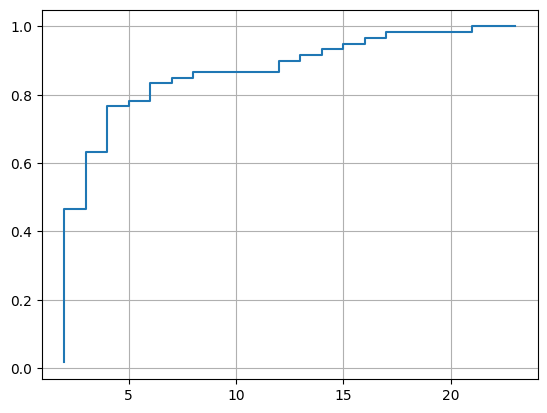

In [21]:
plt.step(d_unique, cdf)
plt.grid()
plt.show()

<p class="task" id="2"></p>

2\. Используя реализацию модели предпочтительного присоединения Барабаши-Альберта из `networkx`, постройте сеть с кол-вом узлов `n=10000`. Визуализируйте закон распределения степеней узлов сети в обычной и логарифимических (по 1й и по 2м осям) системах координат.

- [X] Проверено на семинаре

In [22]:
G = nx.barabasi_albert_graph(10000, 2)

In [23]:
degrees = list(dict(G.degree()).values())

In [24]:
unique_d, counts = np.unique(degrees, return_counts=True)

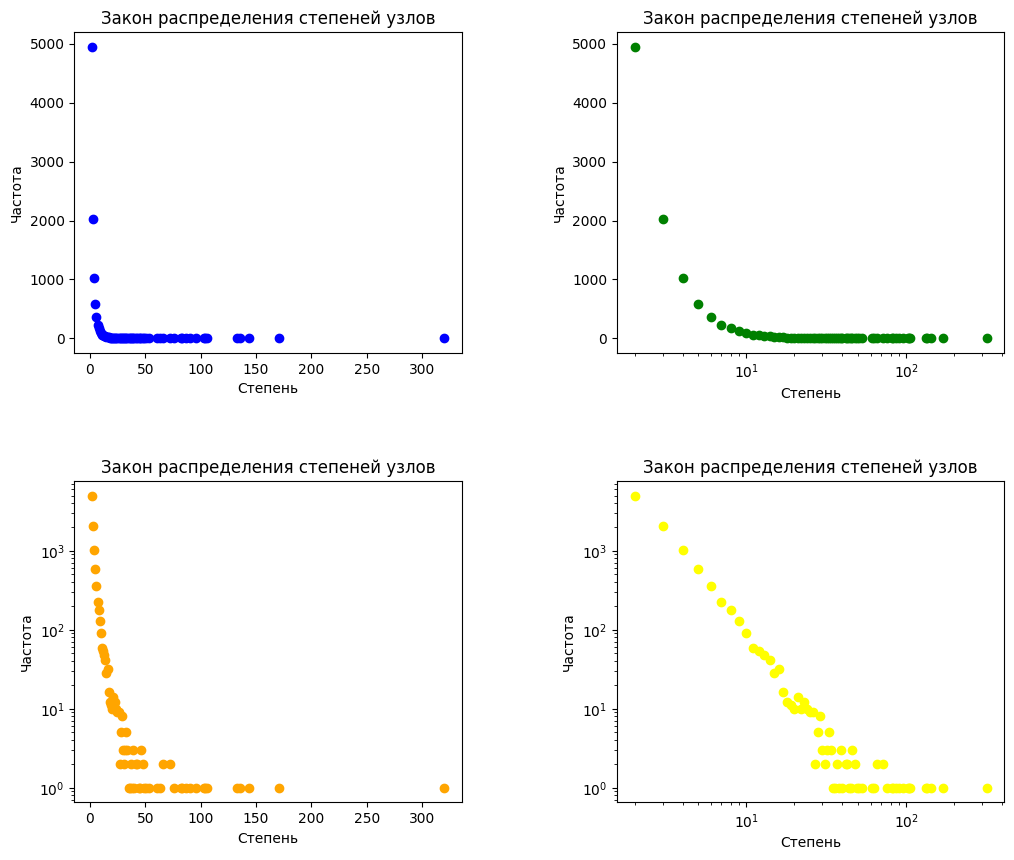

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# обычная ск
axes[0, 0].scatter(unique_d, counts, color='blue')
axes[0, 0].set_title('Закон распределения степеней узлов')
axes[0, 0].set_xlabel('Степень')
axes[0, 0].set_ylabel('Частота')

# х - лог
axes[0, 1].scatter(unique_d, counts, color='green')
axes[0, 1].set_title('Закон распределения степеней узлов')
axes[0, 1].set_xlabel('Степень')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].set_xscale('log')

# у - лог
axes[1, 0].scatter(unique_d, counts, color='orange')
axes[1, 0].set_title('Закон распределения степеней узлов')
axes[1, 0].set_xlabel('Степень')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].set_yscale('log')

# лог - лог
axes[1, 1].scatter(unique_d, counts, color='yellow')
axes[1, 1].set_title('Закон распределения степеней узлов')
axes[1, 1].set_xlabel('Степень')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')

plt.show()


<p class="task" id="3"></p>

3\. Визуализируйте закон распределения степеней узлов с использованием log-binning для сети из предыдущего задания. Для сравнения на этом же графике изобразите график закона распределения без использования log-binning в log-log координатах.

- [ ] Проверено на семинаре

In [102]:
G = nx.barabasi_albert_graph(10000, 2)

In [103]:
degrees = list(dict(G.degree()).values())

In [104]:
unique_d, counts = np.unique(degrees, return_counts=True)

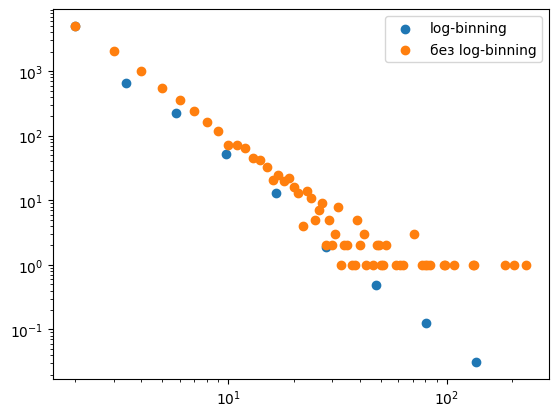

In [105]:
bins = np.logspace(np.log10(min(degrees)), np.log10(max(degrees)), 10)
width = (bins[1:] - bins[:-1])
hist = np.histogram(degrees, bins=bins)
log_bin = hist[0] / width


plt.scatter(bins[:-1], log_bin, label='log-binning')
plt.scatter(unique_d, counts, label = 'без log-binning')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.show()


<p class="task" id="4"></p>

4\. Реализуйте алгоритм предпочтительного присоединения с целочисленными параметрами  `n0`, `m` ,`𝑡`:

* `n0`  - количество узлов в исходной сети (считаем, что исходная сеть является полным графом);
* `m`  - количество связей у каждого вновь добавляемого узла;
* `𝑡`   - количество итераций по добавлению нового узла.

Проверьте корректность алгоритма с помощью анализа распределения степеней узлов сгенерированной сети.

- [ ] Проверено на семинаре

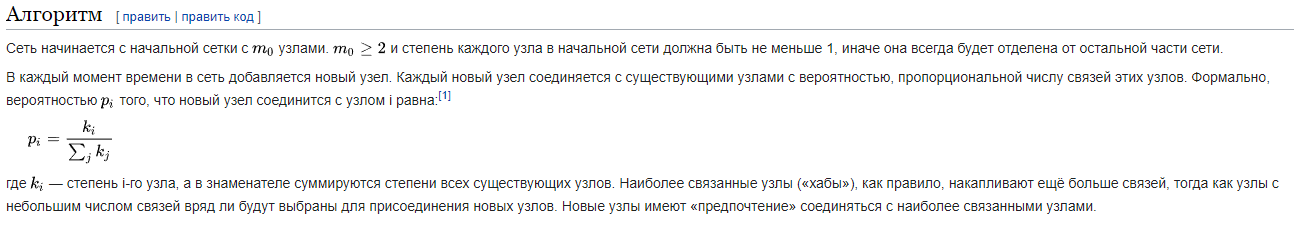

In [67]:
def pref(n0, m, t):
    G = nx.complete_graph(n0)
    nodes = list(G.nodes())
    for i in range(t):

        new_node = max(nodes) + 1
        G.add_node(new_node)

        for j in range(m):

            degrees = np.array([G.degree(node) for node in nodes])
            prob = degrees / sum(degrees)

            selected_node = np.random.choice(nodes, p=prob)

            G.add_edge(new_node, selected_node)

        nodes.append(new_node)

    return G



In [70]:
n0 = 10
m = 3
t = 500

G = pref(n0, m, t)

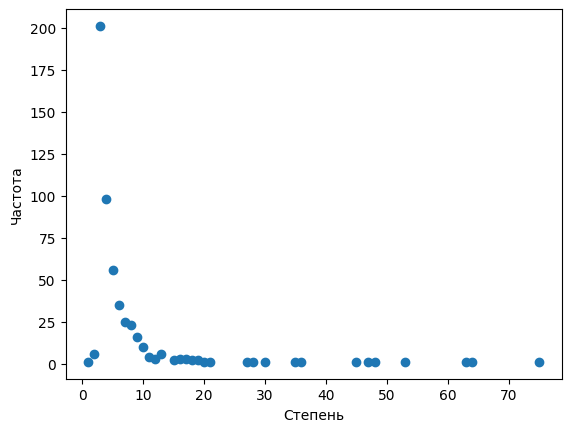

In [71]:
degrees = list(dict(G.degree()).values())
unique_degrees, counts = np.unique(degrees, return_counts=True)

plt.scatter(unique_degrees, counts)
plt.xlabel('Степень')
plt.ylabel('Частота')
plt.show()


<p class="task" id="5"></p>

5\. Используя реализацию расширенной модели Барабаши-Альберта из `networkx`, постройте сеть с кол-вом узлов `n` = 500 с двумя наборами параметров:
* p=0.1, q=0.1
* p=0.3, q=0.3.

Сравните распределение степеней узлов полученных графов и сделайте выводы.

- [ ] Проверено на семинаре

In [106]:
G1  = nx.extended_barabasi_albert_graph(n=500, m=2, p=0.1, q=0.1)
G2  = nx.extended_barabasi_albert_graph(n=500, m=2, p=0.3, q=0.3)

In [107]:
degrees = list(dict(G1.degree()).values())

In [108]:
unique_d, counts = np.unique(degrees, return_counts=True)

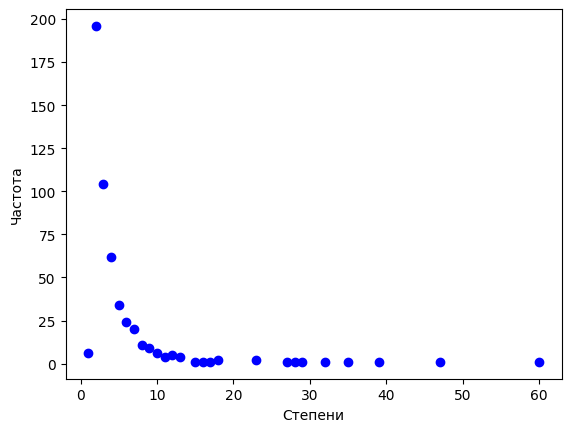

In [109]:
plt.scatter(unique_d, counts, color='blue')
plt.xlabel('Степени')
plt.ylabel('Частота')
plt.show()


In [110]:
degrees = list(dict(G2.degree()).values())

In [111]:
unique_d, counts = np.unique(degrees, return_counts=True)

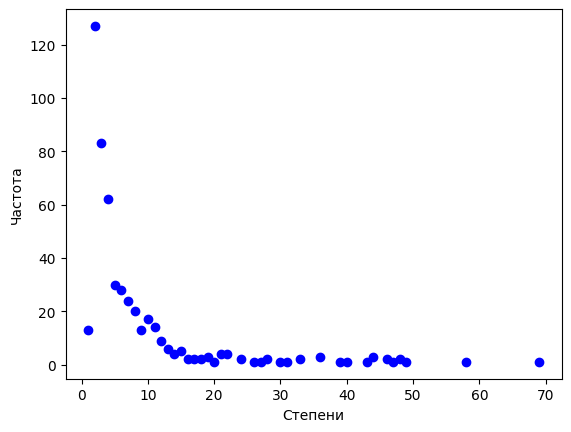

In [112]:
plt.scatter(unique_d, counts, color='blue')
plt.xlabel('Степени')
plt.ylabel('Частота')
plt.show()


In [113]:
# во втором случае более равномерное распределение